In [2]:
import requests

In [18]:
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
headers = {'Accept' : 'application/vnd.github.v3+json'}
r = requests.get(url, headers=headers)
print(f"status code: {r.status_code}")

status code: 200


In [13]:
response_dict = r.json()
print(response_dict.keys())

dict_keys(['total_count', 'incomplete_results', 'items'])


In [14]:
print(f"Total repositories: {response_dict['total_count']}")

Total repositories: 9981285


In [ ]:
print("Selected information about each repositories:")
for repo_dict in repo_dicts:
    print(f"Name: {repo_dict['name']}")
    print(f"Owner: {repo_dict['owner']['login']}")
    print(f"Stars: {repo_dict['stargazers_count']}")
    print(f"Repository: {repo_dict['html_url']}")
    print(f"Created: {repo_dict['created_at']}")
    print(f"Updated: {repo_dict['updated_at']}")
    print(f"Description: {repo_dict['description']}")

In [ ]:
!pip install jupyter_dash

In [ ]:
from plotly.graph_objs import Bar, Layout
from plotly import offline
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [56]:
repo_links, stars, labels = [], [], []
for repo_dict in repo_dicts:
    repo_name = repo_dict['name']
    repo_url = repo_dict['html_url']
    repo_link = f"<a href='{repo_url}'>{repo_name}</a>"
    repo_links.append(repo_link)
    stars.append(repo_dict['stargazers_count'])

    owner = repo_dict['owner']['login']
    description = repo_dict['description']
    label = f"{owner}<br />{description}"
    labels.append(label)


data = [{'type' : 'bar',
        'x' : repo_links,
        'y' : stars,
         'hovertext' : labels,
         'marker' : {'color' : 'rgb(60, 100, 150)', 'line' : {'width' : 1.5, 'color' : 'rgb(25, 25, 25)'}},
         'opacity' : 0.6}]

In [57]:
x_axis_config = {'title': 'Repository', 'dtick' : 1, 'titlefont' : {'size' : 24}, 'tickfont' : {'size' : 14}}
y_axis_config = {'title' : 'Stars', 'titlefont' : {'size' : 24}, 'tickfont' : {'size' : 14}}

my_layout = Layout(title = "Most-Starred Python Projects on Github", xaxis = x_axis_config, yaxis=y_axis_config, titlefont={'size' : 35},
                   )

In [58]:
fig = go.Figure(data=data, layout = my_layout)

In [59]:
fig.show(renderer="colab")

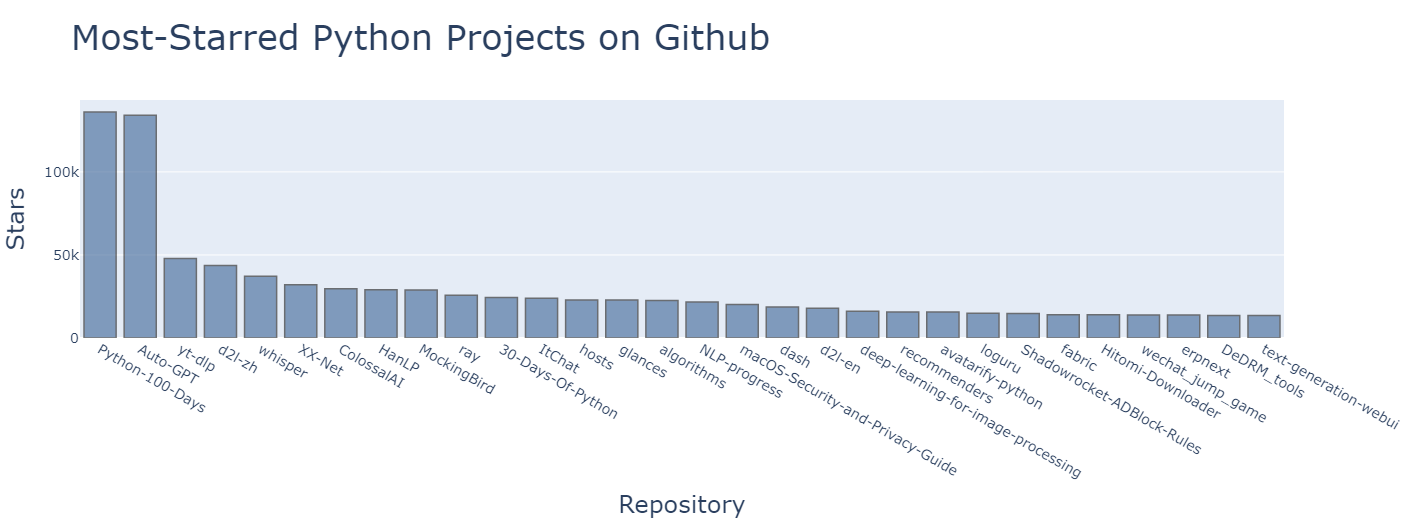

In [61]:
from IPython.display import Image
Image('newplot.png')